# 1. Exploratory Data Analysis on Credit Risk Data
-------------------
FSDS Machine Learning Workshop , October 15, 2022

> <i>Description: Dataset will be cleaned and EDA performed to get more insights on the data.</i>


### Pre requisites: 
1. Make sure the user has all the data science packages installed.
2. `pip install pandas-profiling`

Input Files:
- credit_risk_data.csv  

Output File: 
- cleaned_dataset.csv



## 1. Import Required Packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset and store it as the variable 'df'
df = pd.read_csv('credit_risk_data.csv') 

## 2. Data Cleaning

- `.head()` returns the first n (here 10) rows of the imported dataframe. It is useful for quickly inspecting the df and what kind of data it contains.

In [3]:
df.head(10)

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
0,0.59,D,59000,RENT,16.02,1
1,0.10,B,9600,OWN,11.14,0
2,0.57,C,9600,MORTGAGE,12.87,1
3,0.53,C,65500,RENT,15.23,1
4,0.55,C,54400,RENT,14.27,1
5,0.25,A,9900,OWN,7.14,1
6,0.45,B,77100,RENT,12.42,1
7,0.44,B,78956,RENT,11.11,1
8,0.42,A,83000,RENT,8.90,1
9,0.16,D,10000,OWN,14.74,1


- `.info()` prints information about a df (shape) and its columns (type of column, count of non-null values) and memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_percent_income    32581 non-null  float64
 1   loan_grade             32581 non-null  object 
 2   person_income          32581 non-null  int64  
 3   person_home_ownership  32581 non-null  object 
 4   loan_int_rate          29465 non-null  float64
 5   loan_status            32581 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


- `.describe()` returns descriptive statistics for all the numeric columns in the df. 

In [5]:
df.describe()

,loan_percent_income,person_income,loan_int_rate,loan_status
count,32581.000000,3.258100e+04,29465.000000,32581.000000
mean,0.170203,6.607485e+04,11.011695,0.218164
std,0.106782,6.198312e+04,3.240459,0.413006
min,0.000000,4.000000e+03,5.420000,0.000000
25%,0.090000,3.850000e+04,7.900000,0.000000
50%,0.150000,5.500000e+04,10.990000,0.000000
75%,0.230000,7.920000e+04,13.470000,0.000000
max,0.830000,6.000000e+06,23.220000,1.000000


- `include='object'` parameter is used to show the decriptive statistic for object columns. 

In [6]:
df.describe(include='object')

,loan_grade,person_home_ownership
count,32581,32581
unique,7,4
top,A,RENT
freq,10777,16446


### 2.1 Drop Duplciates

- `.duplicated()` will identify the duplicated records in a df.

In [3]:
# Printing the duplcated records in the dataset
df[df.duplicated()]

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
161,0.42,B,60000,RENT,10.99,1
171,0.42,B,60000,RENT,10.99,1
637,0.36,A,55000,RENT,6.91,1
666,0.33,B,60000,RENT,NaN,1
712,0.28,D,71004,RENT,14.09,0
...,...,...,...,...,...,...
32576,0.11,C,53000,MORTGAGE,13.16,0
32577,0.15,A,120000,MORTGAGE,7.49,0
32578,0.46,B,76000,RENT,10.99,1
32579,0.10,B,150000,MORTGAGE,11.48,0


In [4]:
# dropping duplicated rows
df = df.drop_duplicates()

### 2.2 Filling the missing values

In [5]:
# counting empty values for each column 
df.isnull().sum() 

loan_percent_income         0
loan_grade                  0
person_income               0
person_home_ownership       0
loan_int_rate            2612
loan_status                 0
dtype: int64

- `.value_counts()` returns containing counts of unique values.
Resulting object will be in descending order so that the first element is the most frequently-occurring element. 
Excludes NA values by default, `dropna=False` includes the empty values. 

In [10]:
df['loan_grade'].value_counts(dropna=False)

A    9218
B    9116
C    5679
D    3331
E     890
F     224
G      56
Name: loan_grade, dtype: int64

In [11]:
df['person_home_ownership'].value_counts(dropna=False)

RENT        14380
MORTGAGE    11745
OWN          2290
OTHER          99
Name: person_home_ownership, dtype: int64

- `loan_grade` and `person_home_ownership` are object columns that need to be transformed into numeric values. 

- Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [6]:
df = df.replace(to_replace={'person_home_ownership': {'RENT': 0,
                                                      'MORTGAGE': 1,
                                                      'OWN': 2,
                                                      'OTHER': 3},
                            'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}})

In [7]:
df['loan_grade'].value_counts(dropna=False)

0    9218
1    9116
2    5679
3    3331
4     890
5     224
6      56
Name: loan_grade, dtype: int64

In [8]:
df['person_home_ownership'].value_counts(dropna=False)

0    14380
1    11745
2     2290
3       99
Name: person_home_ownership, dtype: int64

In [15]:
df['loan_status'].value_counts(dropna=False) # target variable 

0    22078
1     6436
Name: loan_status, dtype: int64

In [9]:
# since there are missing values in the column 'loan_int_rate', we fill them with the average interest rate
df['loan_int_rate'].mean()

11.077177051964604

In [11]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

### 2.3 Plots

- `sns.distplot()` visualizes the distribution of the data.

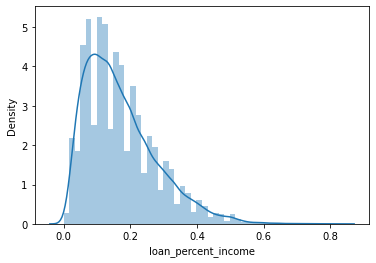

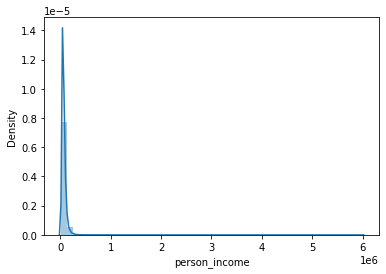

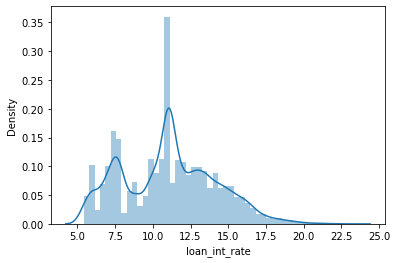

In [12]:
list_columns = ['loan_percent_income', 'person_income', 'loan_int_rate']

for i in list_columns:
    plt.figure()              
    sns.distplot(df[i].dropna()) 

## 3. Exporting the cleaned dataset

In [19]:
df.to_csv("cleaned_dataset.csv", index=None)

## 4. Pandas profiling 

In [20]:
import pandas_profiling
df = pd.read_csv('credit_risk_data.csv') 
profile = pandas_profiling.ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("credit_risk_eda_report.html")

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]